In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy

In [2]:
os.getcwd()

'C:\\Users\\Megan\\Documents\\CareerFoundry\\Unit 4\\InstaCart Python Project\\03 Scripts'

In [3]:
os.getcwd()[-10:]

'03 Scripts'

In [4]:
os.getcwd()[:-10]

'C:\\Users\\Megan\\Documents\\CareerFoundry\\Unit 4\\InstaCart Python Project\\'

In [5]:
path = os.getcwd()[:-10]

In [6]:
# Import df
df_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','4.10_new.pkl'))

In [7]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest Days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'days_median', 'order_frequency_flag', 'gender',
       'state', 'age', '#_dependents', 'marital_status', 'income',
       'geographic_region', 'max_orders', 'activity_flag', 'age_flag',
       'income_class', 'family_size', 'department', 'cust_profile'],
      dtype='object')

In [8]:
df_merged['cust_profile'].value_counts(dropna = False)

Middle-Aged AdultMiddle Class     9640194
Senior AdultMiddle Class          6477403
Young AdultWorking Class          6201411
Middle-Aged AdultWorking Class    4039812
Young AdultMiddle Class           1410011
Senior AdultWorking Class         1281372
Middle-Aged AdultLow Income        683141
Young AdultLow Income              584881
Senior AdultLow Income             344003
Middle-Aged AdultUpper Class       163578
Senior AdultUpper Class             92766
Young AdultUpper Class              45992
Name: cust_profile, dtype: int64

In [9]:
# Create crosstab for customer profiles and family_size 
pd.crosstab(df_merged['cust_profile'], df_merged['#_dependents'], dropna = False)

#_dependents,0,1,2,3
cust_profile,,,,
Middle-Aged AdultLow Income,181527,158395,171477,171742
Middle-Aged AdultMiddle Class,2427751,2424236,2359831,2428376
Middle-Aged AdultUpper Class,40659,39303,42754,40862
Middle-Aged AdultWorking Class,1004228,1022326,1004006,1009252
Senior AdultLow Income,79894,90013,89461,84635
Senior AdultMiddle Class,1606471,1592495,1654411,1624026
Senior AdultUpper Class,23685,21665,23615,23801
Senior AdultWorking Class,311908,324816,326360,318288
Young AdultLow Income,145621,140906,149769,148585


#### There is no significant difference in the number of dependents across customer profiles

In [10]:
pd.crosstab(df_merged['cust_profile'], df_merged['order_day_of_week'], dropna = False)

order_day_of_week,0,1,2,3,4,5,6
cust_profile,,,,,,,
Middle-Aged AdultLow Income,97082,140324,99630,87423,87999,96066,74617
Middle-Aged AdultMiddle Class,1886327,1656716,1242098,1129121,1115812,1240935,1369185
Middle-Aged AdultUpper Class,26690,30697,22033,20985,20632,22291,20250
Middle-Aged AdultWorking Class,756822,709274,531219,482351,475672,534365,550109
Senior AdultLow Income,50838,68951,50494,45356,43005,48281,37078
Senior AdultMiddle Class,1279458,1093732,826334,762329,747823,833573,934154
Senior AdultUpper Class,14965,15069,13156,11838,12654,13793,11291
Senior AdultWorking Class,220983,239743,175186,158827,152679,170468,163486
Young AdultLow Income,87018,120393,85017,74602,73628,82465,61758


#### The majority of orders are placed on the weekends (0, 1) in all groups

In [11]:
pd.crosstab(df_merged['order_hour'], df_merged['cust_profile'], dropna = False)

cust_profile,Middle-Aged AdultLow Income,Middle-Aged AdultMiddle Class,Middle-Aged AdultUpper Class,Middle-Aged AdultWorking Class,Senior AdultLow Income,Senior AdultMiddle Class,Senior AdultUpper Class,Senior AdultWorking Class,Young AdultLow Income,Young AdultMiddle Class,Young AdultUpper Class,Young AdultWorking Class
order_hour,,,,,,,,,,,,
0,4129,65035,1029,27533,2170,42646,302,8277,4464,10347,205,41905
1,2126,33619,814,14646,1099,23036,250,4303,1779,5053,98,22798
2,1419,19292,734,8426,713,13536,212,2997,1467,3165,170,13560
3,1141,13926,475,6448,712,10583,100,2000,901,2450,108,9952
4,1184,15587,620,5826,579,10935,192,1974,894,2241,64,10667
5,1642,25959,822,10296,754,18742,235,3555,1183,4591,188,16451
6,5484,86455,2432,34308,3548,60142,675,10864,4060,13623,346,59076
7,17442,271192,5072,106470,8819,186894,2524,34830,13030,39418,1422,176100
8,37907,517744,9203,214842,18276,350614,4328,68240,29697,75365,2789,330105


#### All customer profiles see a marked increase in order starting at 7am and peaking around 10am. Prime ordering times are between 10am and 4pm.

## 06. Create an appropriate visualization to show the distribution of profiles.

In [12]:
bar_profiles = df_merged['cust_profile'].value_counts()/1000000

Text(0, 0.5, 'Count of Profiles, in millions')

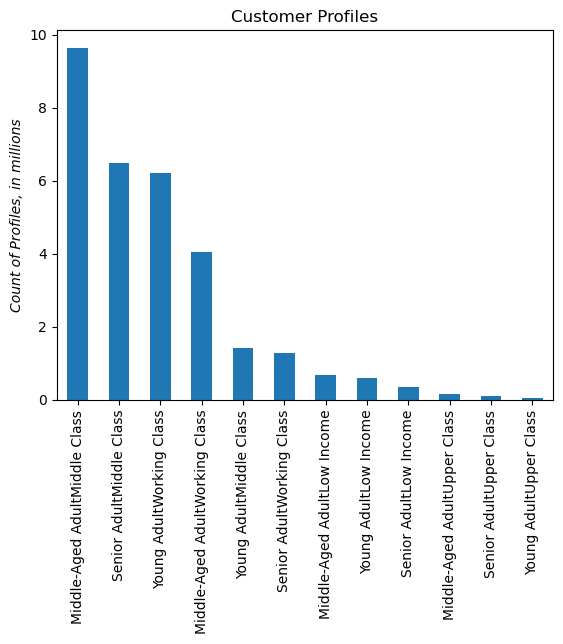

In [13]:
cust_profiles = bar_profiles.plot.bar()
plt.title("Customer Profiles")
plt.ylabel('Count of Profiles, in millions', style='italic')

In [14]:
# Export Bar Chart 
cust_profiles.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','cust_profile_bar.png'))

## 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [15]:
# Change max number of rows  
pd.options.display.max_columns = None

In [16]:
df_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,days_median,order_frequency_flag,gender,state,age,#_dependents,marital_status,income,geographic_region,max_orders,activity_flag,age_flag,income_class,family_size,department,cust_profile
0,2539329,1,1,2,8,11.0,196,1,0,both,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Average Orders,10,Regular Customer,6.367797,Low Spender,20.0,Regular Customer,Female,Alabama,31,3,married,40423,South,10,Normal/High Activity,Young Adult,Working Class,Large Family,beverages,Young AdultWorking Class
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-Range Product,Least Busy,Average Orders,10,Regular Customer,6.367797,Low Spender,20.0,Regular Customer,Female,Alabama,31,3,married,40423,South,10,Normal/High Activity,Young Adult,Working Class,Large Family,beverages,Young AdultWorking Class
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-Range Product,Least Busy,Most Orders,10,Regular Customer,6.367797,Low Spender,20.0,Regular Customer,Female,Alabama,31,3,married,40423,South,10,Normal/High Activity,Young Adult,Working Class,Large Family,beverages,Young AdultWorking Class
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-Range Product,Least Busy,Average Orders,10,Regular Customer,6.367797,Low Spender,20.0,Regular Customer,Female,Alabama,31,3,married,40423,South,10,Normal/High Activity,Young Adult,Working Class,Large Family,beverages,Young AdultWorking Class
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-Range Product,Least Busy,Most Orders,10,Regular Customer,6.367797,Low Spender,20.0,Regular Customer,Female,Alabama,31,3,married,40423,South,10,Normal/High Activity,Young Adult,Working Class,Large Family,beverages,Young AdultWorking Class


In [17]:
df_merged.groupby('cust_profile').agg({'prices': ['mean','min','max']})

prices           
                                    mean  min   max
cust_profile                                       
Middle-Aged AdultLow Income     6.498091  1.0  25.0
Middle-Aged AdultMiddle Class   7.958388  1.0  25.0
Middle-Aged AdultUpper Class    7.811718  1.0  25.0
Middle-Aged AdultWorking Class  7.606946  1.0  25.0
Senior AdultLow Income          6.518282  1.0  25.0
Senior AdultMiddle Class        7.960293  1.0  25.0
Senior AdultUpper Class         7.753401  1.0  25.0
Senior AdultWorking Class       7.316180  1.0  25.0
Young AdultLow Income           6.499457  1.0  25.0
Young AdultMiddle Class         7.943458  1.0  25.0
Young AdultUpper Class          7.793023  1.0  25.0
Young AdultWorking Class        7.870149  1.0  25.0

#### Average spending for the middle class is higher overall than other income classes

In [18]:
df_merged.groupby('cust_profile').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                                                 mean  min   max
cust_profile                                                    
Middle-Aged AdultLow Income                 11.325845  0.0  30.0
Middle-Aged AdultMiddle Class               10.806970  0.0  30.0
Middle-Aged AdultUpper Class                10.207412  0.0  30.0
Middle-Aged AdultWorking Class              10.801604  0.0  30.0
Senior AdultLow Income                      11.169783  0.0  30.0
Senior AdultMiddle Class                    10.782783  0.0  30.0
Senior AdultUpper Class                      9.883589  0.0  30.0
Senior AdultWorking Class                   10.873236  0.0  30.0
Young AdultLow Income                       11.229944  0.0  30.0
Young AdultMiddle Class                     10.731601  0.0  30.0
Young AdultUpper Class                      10.625957  0.0  30.0
Young AdultWorking Class                    10.820413  0.0  30.0

#### Members of the upper class order a bit more frequently than other income classes

## 08. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [19]:
pd.crosstab(df_merged['cust_profile'], df_merged['geographic_region'], dropna = False)

geographic_region,Midwest,Northeast,South,Southwest,West
cust_profile,,,,,
Middle-Aged AdultLow Income,160479,114475,224589,63643,119955
Middle-Aged AdultMiddle Class,2305060,1689933,2963358,980167,1701676
Middle-Aged AdultUpper Class,39172,26687,49650,16271,31798
Middle-Aged AdultWorking Class,940883,680708,1296820,397339,724062
Senior AdultLow Income,74059,65989,106911,34636,62408
Senior AdultMiddle Class,1509588,1172198,2026689,654967,1113961
Senior AdultUpper Class,26240,14868,28983,7862,14813
Senior AdultWorking Class,294159,231752,391301,125626,238534
Young AdultLow Income,139045,102660,184606,61128,97442


In [20]:
cross_dept = pd.crosstab(df_merged['department'], df_merged['cust_profile'], dropna = False)

In [21]:
# Copy crosstab to filter in Excel
cross_dept.to_clipboard()

In [22]:
cross_dept

cust_profile,Middle-Aged AdultLow Income,Middle-Aged AdultMiddle Class,Middle-Aged AdultUpper Class,Middle-Aged AdultWorking Class,Senior AdultLow Income,Senior AdultMiddle Class,Senior AdultUpper Class,Senior AdultWorking Class,Young AdultLow Income,Young AdultMiddle Class,Young AdultUpper Class,Young AdultWorking Class
department,,,,,,,,,,,,
alcohol,3738,42768,3582,17629,1874,26362,2644,5813,3106,8467,1319,27325
babies,4877,137671,1448,52892,3090,87998,693,14423,4580,18813,262,83645
bakery,21196,355878,7888,141148,10339,237371,4768,43519,17874,52351,2449,226047
beverages,79843,760788,14737,355496,42657,508756,9726,122881,69162,111121,4129,492605
breakfast,19299,201334,4045,90553,10434,133164,2492,29206,16333,30023,1074,132893
bulk,1015,9852,17,4601,374,6803,9,1759,858,1382,3,6778
canned goods,14228,328996,5878,124678,7773,220146,3139,36451,12945,47575,1788,208477
dairy eggs,97667,1634364,29108,661670,50645,1098137,16035,203255,87240,242704,7927,1048430
deli,22281,314511,4769,130604,10526,212094,2770,39809,18548,44944,1254,201724


## 09. Produce suitable charts to illustrate your results and export them in your project folder.

In [23]:
bar_class = df_merged['income_class'].value_counts()/1000000

Text(0, 0.5, 'Count of Profiles, in millions')

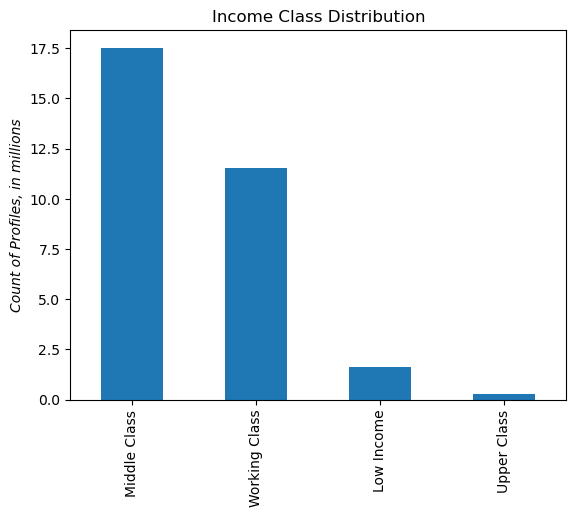

In [24]:
# Create Bar chart to show income class distribution 
class_dist = bar_class.plot.bar()
plt.title("Income Class Distribution")
plt.ylabel('Count of Profiles, in millions', style='italic')

Text(0, 0.5, 'Count of Purchases, in millions')

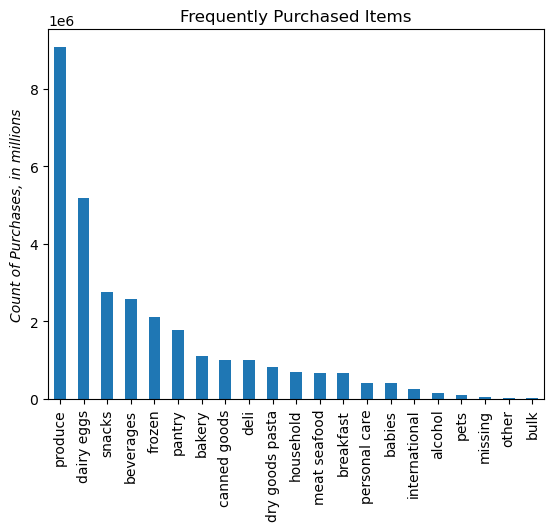

In [25]:
# Create bar chart to show the items most commonly purchased 
items = df_merged['department'].value_counts().plot.bar()
plt.title("Frequently Purchased Items")
plt.ylabel('Count of Purchases, in millions', style='italic')

Text(0, 0.5, 'Number of Orders, in Millions')

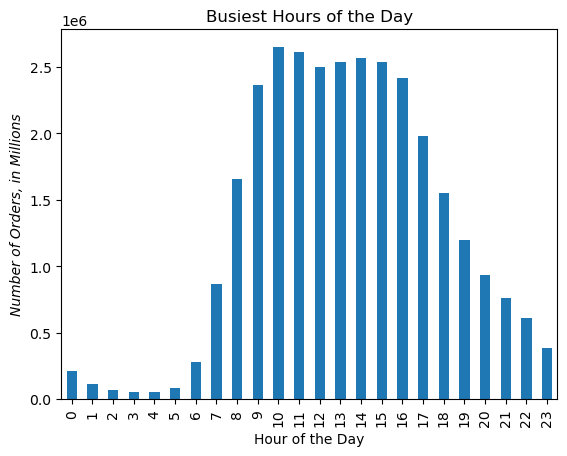

In [26]:
# Create bar chart for order hour of day 
hour_chart = df_merged['order_hour'].value_counts().sort_index().plot.bar()
plt.title("Busiest Hours of the Day")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders, in Millions', style='italic')

Text(0, 0.5, 'Frequency of Orders, in Millions')

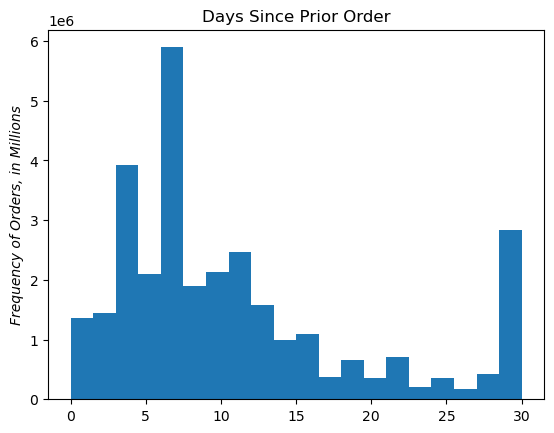

In [27]:
days = df_merged['days_since_prior_order'].plot.hist(bins = 20) 
plt.title("Days Since Prior Order") 
plt.ylabel('Frequency of Orders, in Millions', style='italic')

In [28]:
region_dist = df_merged['geographic_region'].value_counts()/1000000

Text(0, 0.5, 'Number of Customers, in Millions')

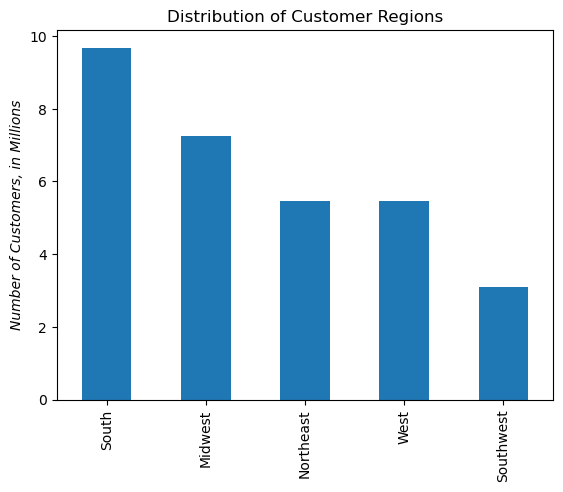

In [29]:
regions = region_dist.plot.bar()
plt.title("Distribution of Customer Regions")
plt.ylabel('Number of Customers, in Millions', style='italic')

In [30]:
# Export charts 
class_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','class_dist.png'))

In [31]:
items.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','items_purchased.png'))

In [32]:
hour_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','order_hour.png'))

In [33]:
regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','regions.png'))

In [34]:
days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','prior_order.png'))

In [35]:
# Export final dataframe 
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data','df_cust_profiles.pkl'))